In [1]:
# relevant imports

from typing import Dict, List

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# increase size of text on figures and make it clearer

plt.rc("axes", titlesize=18)
plt.rc("axes", labelsize=17)
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)
plt.rc("legend", fontsize=14)
plt.rc("font", size=14)
plt.rc("lines", linewidth=2)

In [3]:
# loads sheets + clean them

tabular_sheets = [pd.read_csv("tabular/tabular-2022-04-06 19-25-52.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 19-26-00.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 20-10-37.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 20-20-09.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 20-21-41.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 21-06-54.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 21-24-37.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 23-19-45.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 23-59-08.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 23-59-08.csv"),
                  pd.read_csv("tabular/tabular-2022-04-07 02-01-19.csv"),
                  pd.read_csv("tabular/tabular-2022-04-07 02-17-17.csv"),
                  pd.read_csv("tabular/tabular-2022-04-07 02-22-03.csv"),
                  pd.read_csv("tabular/tabular-2022-04-07 05-57-51.csv"),
                  pd.read_csv("tabular/tabular-2022-04-07 07-34-37.csv")]

for idx, tab_sheet in enumerate(tabular_sheets):
    tabular_sheets[idx] = tab_sheet.drop(["Unnamed: 0"], axis=1)
    tabular_sheets[idx]["model"] = tab_sheet["model"].fillna("Tabular")

df = pd.concat(tabular_sheets, ignore_index=True)

In [4]:
df

,model,lookback,epsilon,epsilon_decay,decay_limit,learning_rate,discount_rate,epochs,tr_cooperation_percentage,tr_defection_percentage,tr_final_loss,tr_mean_reward,tr_cumul_reward,tr_cumul_regret,tn_rank,tn_mean_score,tn_mean_time,agents
0,Tabular,1,0.05,0.0,0.05,0.001,0.95,2500,0.695561,0.304439,NaN,2.553634,11491351.0,2008649.0,22,743.071613,3.965786,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
1,Tabular,1,0.05,0.0,0.05,0.001,0.99,2500,0.924345,0.075655,NaN,2.864299,12889347.0,610653.0,15,759.501290,4.084504,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
2,Tabular,1,0.05,0.0,0.05,0.010,0.95,2500,0.618454,0.381546,NaN,2.470332,11116493.0,2383507.0,26,499.807097,8.137073,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
3,Tabular,1,0.05,0.0,0.05,0.010,0.99,2500,0.800520,0.199480,NaN,2.710782,12198517.0,1301483.0,25,720.789677,4.324476,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
4,Tabular,1,0.05,0.0,0.05,0.050,0.95,2500,0.463220,0.536780,NaN,2.301235,10355558.0,3144442.0,30,444.765806,28.180800,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Tabular,12,0.20,0.0,0.05,0.010,0.99,2500,0.572205,0.427795,NaN,2.203565,8814262.0,3185738.0,18,754.338065,5.581107,"TitForTat,TFTT,TTFT,GenerousTFT,OmegaTFT,Davis..."
913,Tabular,12,0.20,0.0,0.05,0.050,0.95,2500,0.558094,0.441906,NaN,2.183067,8732267.0,3267733.0,18,757.400968,7.396016,"TitForTat,TFTT,TTFT,GenerousTFT,OmegaTFT,Davis..."
914,Tabular,12,0.20,0.0,0.05,0.050,0.99,2500,0.583655,0.416345,NaN,2.201851,8807403.0,3192597.0,16,754.091935,6.149058,"TitForTat,TFTT,TTFT,GenerousTFT,OmegaTFT,Davis..."
915,Tabular,12,0.20,0.0,0.05,0.100,0.95,2500,0.534894,0.465106,NaN,2.159769,8639078.0,3360922.0,16,750.195484,5.678003,"TitForTat,TFTT,TTFT,GenerousTFT,OmegaTFT,Davis..."


In [5]:
# turn agents from str repr of agents to list of agents.

df["agents"] = df["agents"].apply(lambda x: str(x).split(","))

In [6]:
# auxiliary functions to plot various graphs

def plot_histogram(
        x: pd.DataFrame, bins: int, xlabel: str, ylabel: str, title: str
    ) -> None:
    plt.figure(figsize=(14,7))
    ax = plt.gca()
    x.hist(ax=ax, bins=bins, density=True, color="xkcd:azure")
    x.plot.kde(ax=ax, color="xkcd:tangerine")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.xlim([x.min(), x.max()])
 
def plot_linegraph(
        x: Dict, xlabel: str, ylabel: str, title: str
    ) -> None:
    plt.figure(figsize=(14,7))
    df_x = pd.DataFrame(data=x)
    plt.plot(df_x[xlabel], df_x[ylabel])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def plot_barchart(
        x: Dict, xlabel: str, ylabel: str, title: str, rotate: bool = False
    ) -> None:
    plt.figure(figsize=(12, 12))
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.bar(x[xlabel], x[ylabel], width=0.4, color="xkcd:azure")
    plt.xticks(rotation=rotate)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


<h1><center>AVERAGE RANK</center></h1>

In [7]:
# average rank of tabular agents

df["tn_rank"].sum() / len(df)

20.531079607415485

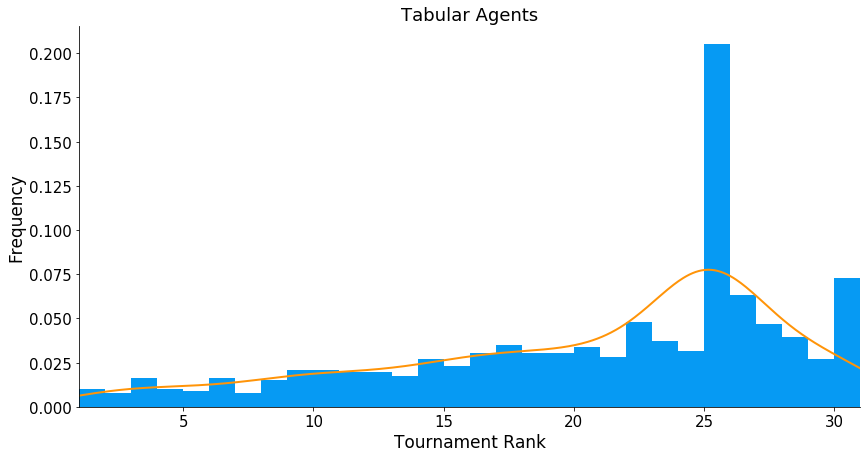

In [8]:
plot_histogram(df["tn_rank"], 30, "Tournament Rank", "Frequency", "Tabular Agents")

<h1><center>STRATEGY ANALYSIS</center></h1>

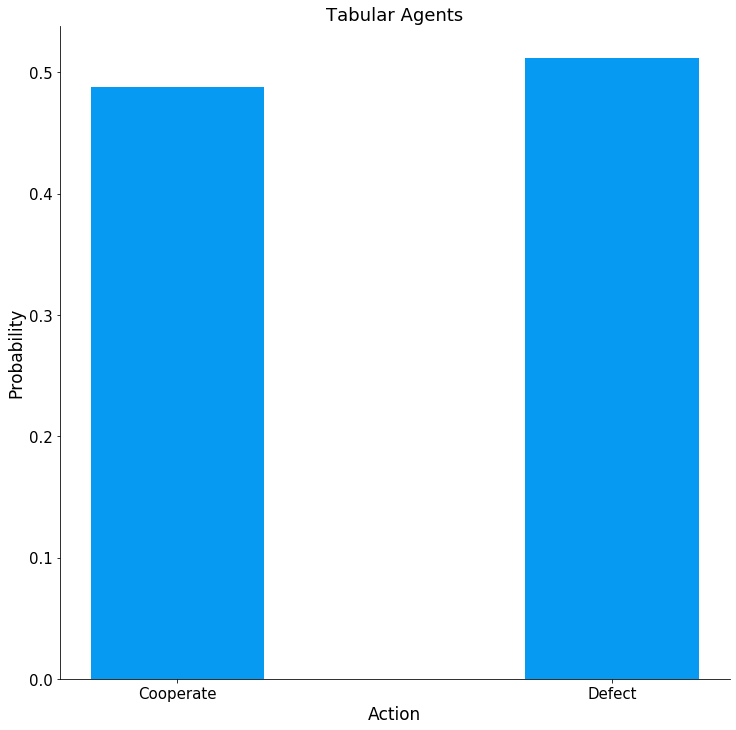

In [9]:
# probability of coop vs defect on a whole for tabular

prob_actions_all = {
    "Action" : ["Cooperate", "Defect"],
    "Probability" : [
        df["tr_cooperation_percentage"].sum() / len(df),
        df["tr_defection_percentage"].sum() / len(df)
    ]
}
plot_barchart(prob_actions_all, "Action", "Probability", "Tabular Agents")

Number of tabular agents ranking 5th or lower: 48
Probability of Cooperating: 0.5491117934689154
Probability of Defecting: 0.45088820653108463


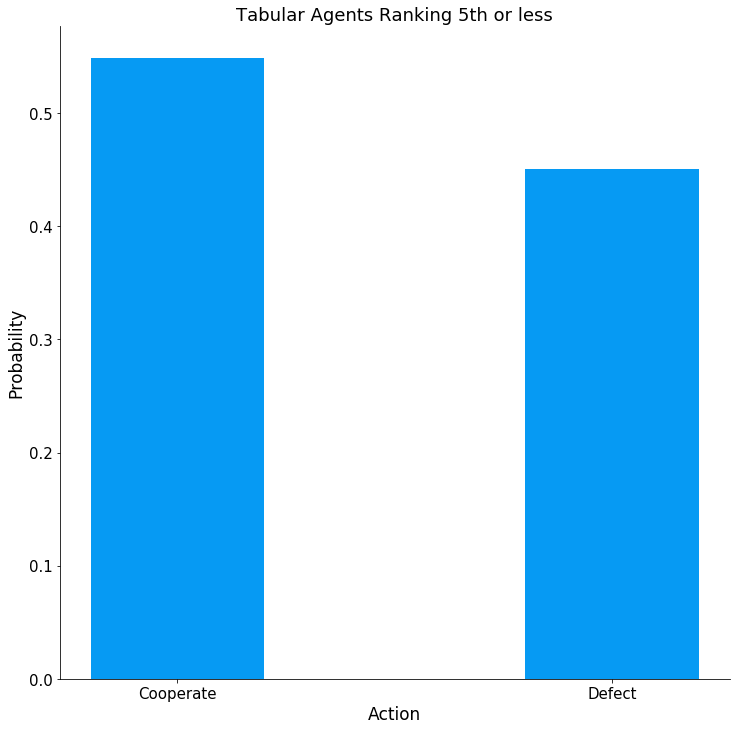

In [10]:
df_agents_top_5 = df[df["tn_rank"] <= 5]
prob_actions_top_5 = {
    "Action" : ["Cooperate", "Defect"],
    "Probability" : [
        df_agents_top_5["tr_cooperation_percentage"].sum() / len(df_agents_top_5),
        df_agents_top_5["tr_defection_percentage"].sum() / len(df_agents_top_5)
    ]
}

print(f"Number of tabular agents ranking 5th or lower: {len(df_agents_top_5)}")
print(f"Probability of Cooperating: {prob_actions_top_5['Probability'][0]}")
print(f"Probability of Defecting: {prob_actions_top_5['Probability'][1]}")

plot_barchart(prob_actions_top_5, "Action", "Probability", "Tabular Agents Ranking 5th or less")

Number of tabular agents ranking 26th or higher: 229
Probability of Cooperating: 0.28926198442157064
Probability of Defecting: 0.7107380155784292


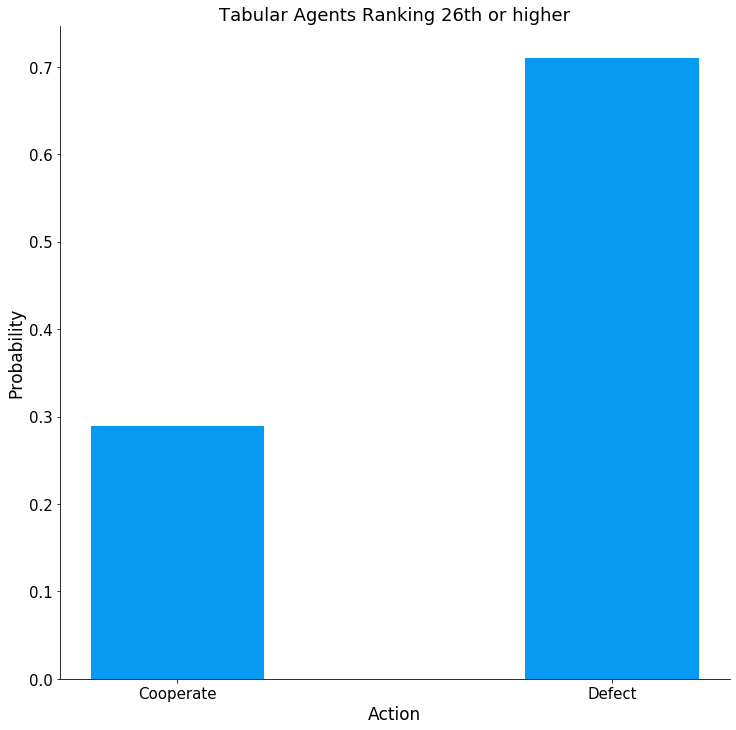

In [11]:
df_agents_bottom_5 = df[df["tn_rank"] >= 26]
prob_actions_bottom_5 = {
    "Action" : ["Cooperate", "Defect"],
    "Probability" : [
        df_agents_bottom_5["tr_cooperation_percentage"].sum() / len(df_agents_bottom_5),
        df_agents_bottom_5["tr_defection_percentage"].sum() / len(df_agents_bottom_5)
    ]
}
print(f"Number of tabular agents ranking 26th or higher: {len(df_agents_bottom_5)}")
print(f"Probability of Cooperating: {prob_actions_bottom_5['Probability'][0]}")
print(f"Probability of Defecting: {prob_actions_bottom_5['Probability'][1]}")
plot_barchart(prob_actions_bottom_5, "Action", "Probability", "Tabular Agents Ranking 26th or higher")

<h1><center>EPSILON</center></h1>

In [12]:
df["epsilon"].value_counts()

0.10    309
0.05    304
0.20    304
Name: epsilon, dtype: int64

Epsilon Count  Avg Rank
0.05    304    18.961
0.1    309    19.693
0.2    304    22.954


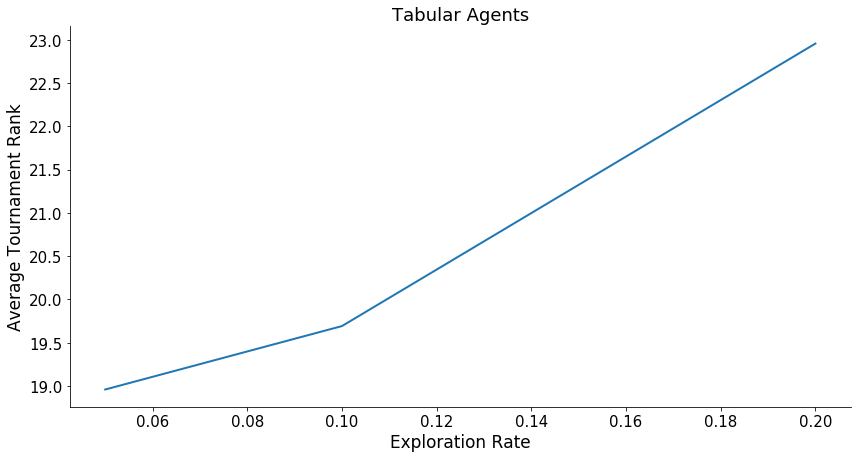

In [13]:
avg_epsil_all = {
    "Exploration Rate" : [0.05, 0.1, 0.2],
    "Average Tournament Rank" : [
        df[df["epsilon"] == 0.05]["tn_rank"].sum() / len(df[df["epsilon"] == 0.05]),
        df[df["epsilon"] == 0.1]["tn_rank"].sum() / len(df[df["epsilon"] == 0.1]),
        df[df["epsilon"] == 0.2]["tn_rank"].sum() / len(df[df["epsilon"] == 0.2])     
    ]
}
print("Epsilon Count  Avg Rank")
print(f"{avg_epsil_all['Exploration Rate'][0]}    {len(df[df['epsilon'] == 0.05])}    {avg_epsil_all['Average Tournament Rank'][0]:.3f}")
print(f"{avg_epsil_all['Exploration Rate'][1]}    {len(df[df['epsilon'] == 0.1])}    {avg_epsil_all['Average Tournament Rank'][1]:.3f}")
print(f"{avg_epsil_all['Exploration Rate'][2]}    {len(df[df['epsilon'] == 0.2])}    {avg_epsil_all['Average Tournament Rank'][2]:.3f}")

plot_linegraph(avg_epsil_all, "Exploration Rate", "Average Tournament Rank", "Tabular Agents")

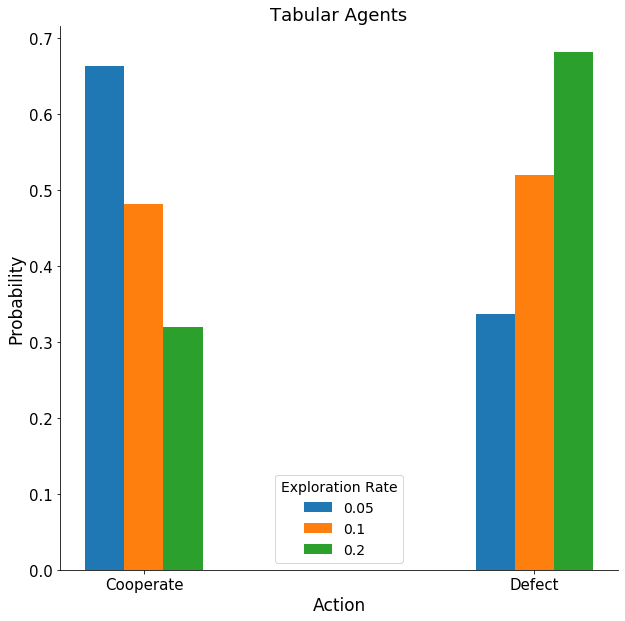

In [14]:
coop_epsil_05 = df[df["epsilon"] == 0.05]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.05])
coop_epsil_1 = df[df["epsilon"] == 0.1]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.1])
coop_epsil_2 = df[df["epsilon"] == 0.2]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.2])

defect_epsil_05 = df[df["epsilon"] == 0.05]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.05])
defect_epsil_1 = df[df["epsilon"] == 0.1]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.1])
defect_epsil_2 = df[df["epsilon"] == 0.2]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.2])

cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(10, 10))
plt.bar(x_axis - 0.1, [coop_epsil_05, defect_epsil_05], 0.1, label="0.05")
plt.bar(x_axis, [coop_epsil_1, defect_epsil_1], 0.1, label="0.1")
plt.bar(x_axis + 0.1, [coop_epsil_2, defect_epsil_2], 0.1, label="0.2")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents")
plt.legend(title="Exploration Rate")

<h1><center>LOOKBACK</center></h1>

In [15]:
df["lookback"].value_counts()

4     242
8     242
2     217
1     192
12     24
Name: lookback, dtype: int64

Lookback Count  Avg Rank
1    192    24.135
2    217    21.217
4    242    20.182
8    242    17.781


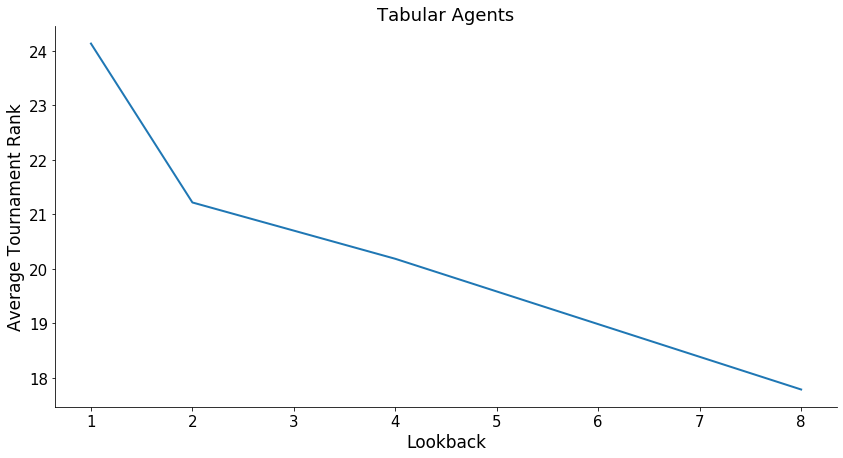

In [16]:
avg_lb_all =  {
    "Lookback" : [1, 2, 4, 8],
    "Average Tournament Rank" : [
        df[df["lookback"] == 1]["tn_rank"].sum() / len(df[df["lookback"] == 1]),
        df[df["lookback"] == 2]["tn_rank"].sum() / len(df[df["lookback"] == 2]),
        df[df["lookback"] == 4]["tn_rank"].sum() / len(df[df["lookback"] == 4]),
        df[df["lookback"] == 8]["tn_rank"].sum() / len(df[df["lookback"] == 8])
    ]
}

print("Lookback Count  Avg Rank")
print(f"{avg_lb_all['Lookback'][0]}    {len(df[df['lookback'] == 1])}    {avg_lb_all['Average Tournament Rank'][0]:.3f}")
print(f"{avg_lb_all['Lookback'][1]}    {len(df[df['lookback'] == 2])}    {avg_lb_all['Average Tournament Rank'][1]:.3f}")
print(f"{avg_lb_all['Lookback'][2]}    {len(df[df['lookback'] == 4])}    {avg_lb_all['Average Tournament Rank'][2]:.3f}")
print(f"{avg_lb_all['Lookback'][3]}    {len(df[df['lookback'] == 8])}    {avg_lb_all['Average Tournament Rank'][3]:.3f}")
plot_linegraph(avg_lb_all, "Lookback", "Average Tournament Rank", "Tabular Agents")

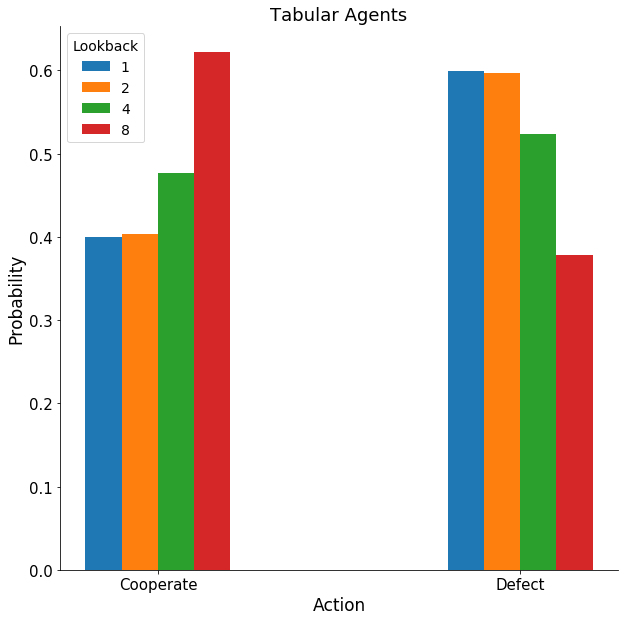

In [17]:
coop_lb_1 = df[df["lookback"] == 1]["tr_cooperation_percentage"].sum() / len(df[df["lookback"] == 1])
coop_lb_2 = df[df["lookback"] == 2]["tr_cooperation_percentage"].sum() / len(df[df["lookback"] == 2])
coop_lb_4 = df[df["lookback"] == 4]["tr_cooperation_percentage"].sum() / len(df[df["lookback"] == 4])
coop_lb_8 = df[df["lookback"] == 8]["tr_cooperation_percentage"].sum() / len(df[df["lookback"] == 8])

defect_lb_1 = df[df["lookback"] == 1]["tr_defection_percentage"].sum() / len(df[df["lookback"] == 1])
defect_lb_2 = df[df["lookback"] == 2]["tr_defection_percentage"].sum() / len(df[df["lookback"] == 2])
defect_lb_4 = df[df["lookback"] == 4]["tr_defection_percentage"].sum() / len(df[df["lookback"] == 4])
defect_lb_8 = df[df["lookback"] == 8]["tr_defection_percentage"].sum() / len(df[df["lookback"] == 8])

cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(10, 10))
plt.bar(x_axis - 0.15, [coop_lb_1, defect_lb_1], 0.1, label="1")
plt.bar(x_axis - 0.05, [coop_lb_2, defect_lb_2], 0.1, label="2")
plt.bar(x_axis + 0.05, [coop_lb_4, defect_lb_4], 0.1, label="4")
plt.bar(x_axis + 0.15, [coop_lb_8, defect_lb_8], 0.1, label="8")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents")
plt.legend(title="Lookback")

<h1><center>DISCOUNT RATE</center></h1>

In [18]:
df["discount_rate"].value_counts()

0.99    461
0.95    456
Name: discount_rate, dtype: int64

DiscountRate Count  Avg Rank
0.95    456    20.936
0.99    461    20.130


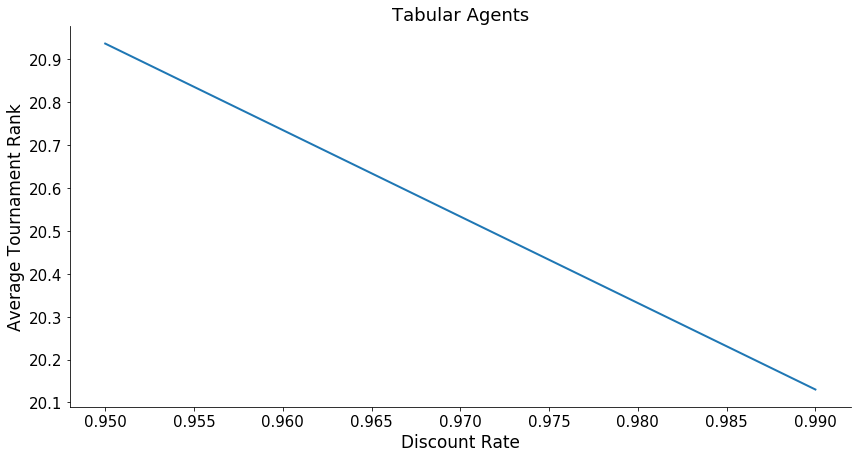

In [19]:
avg_dr_all =  {
    "Discount Rate" : [0.95, 0.99],
    "Average Tournament Rank" : [
        df[df["discount_rate"] == 0.95]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.95]),
        df[df["discount_rate"] == 0.99]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.99]),
    ]
}

print("DiscountRate Count  Avg Rank")
print(f"{avg_dr_all['Discount Rate'][0]}    {len(df[df['discount_rate'] == 0.95])}    {avg_dr_all['Average Tournament Rank'][0]:.3f}")
print(f"{avg_dr_all['Discount Rate'][1]}    {len(df[df['discount_rate'] == 0.99])}    {avg_dr_all['Average Tournament Rank'][1]:.3f}")
plot_linegraph(avg_dr_all, "Discount Rate", "Average Tournament Rank", "Tabular Agents")

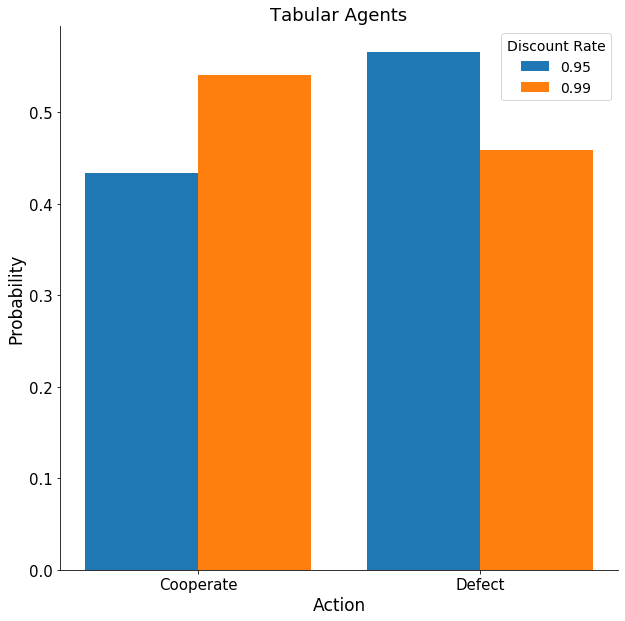

In [25]:
coop_dr_95 = df[df["discount_rate"] == 0.95]["tr_cooperation_percentage"].sum() / len(df[df["discount_rate"] == 0.95])
coop_dr_99 = df[df["discount_rate"] == 0.99]["tr_cooperation_percentage"].sum() / len(df[df["discount_rate"] == 0.99])

defect_dr_95 = df[df["discount_rate"] == 0.95]["tr_defection_percentage"].sum() / len(df[df["discount_rate"] == 0.95])
defect_dr_99 = df[df["discount_rate"] == 0.99]["tr_defection_percentage"].sum() / len(df[df["discount_rate"] == 0.99])

plt.figure(figsize=(10,10))
plt.bar(x_axis - 0.2, [coop_dr_95, defect_dr_95], 0.4, label="0.95")
plt.bar(x_axis + 0.2, [coop_dr_99, defect_dr_99], 0.4, label="0.99")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents")
plt.legend(title="Discount Rate")

<h1><center>LEARNING RATE</center></h1>

In [20]:
df["learning_rate"].value_counts()

0.010    233
0.001    228
0.050    228
0.100    228
Name: learning_rate, dtype: int64

Learning Rate Count  Avg Rank
0.001    228    19.311
0.01    233    20.365
0.05    228    21.373
0.1    228    21.079


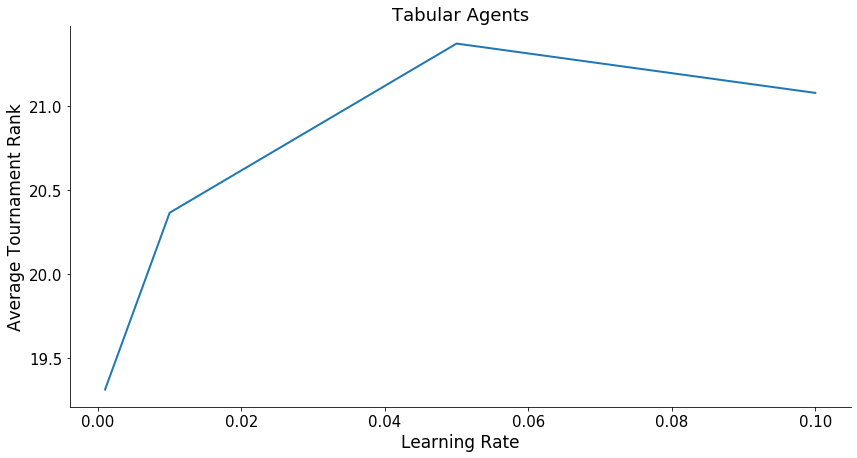

In [21]:
avg_lr_all =  {
    "Learning Rate" : [0.001, 0.01, 0.05, 0.1],
    "Average Tournament Rank" : [
        df[df["learning_rate"] == 0.001]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.001]),
        df[df["learning_rate"] == 0.01]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.01]),
        df[df["learning_rate"] == 0.05]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.05]),
        df[df["learning_rate"] == 0.1]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.1]),
    ]
}

print("Learning Rate Count  Avg Rank")
print(f"{avg_lr_all['Learning Rate'][0]}    {len(df[df['learning_rate'] == 0.001])}    {avg_lr_all['Average Tournament Rank'][0]:.3f}")
print(f"{avg_lr_all['Learning Rate'][1]}    {len(df[df['learning_rate'] == 0.01])}    {avg_lr_all['Average Tournament Rank'][1]:.3f}")
print(f"{avg_lr_all['Learning Rate'][2]}    {len(df[df['learning_rate'] == 0.05])}    {avg_lr_all['Average Tournament Rank'][2]:.3f}")
print(f"{avg_lr_all['Learning Rate'][3]}    {len(df[df['learning_rate'] == 0.1])}    {avg_lr_all['Average Tournament Rank'][3]:.3f}")
plot_linegraph(avg_lr_all, "Learning Rate", "Average Tournament Rank", "Tabular Agents")

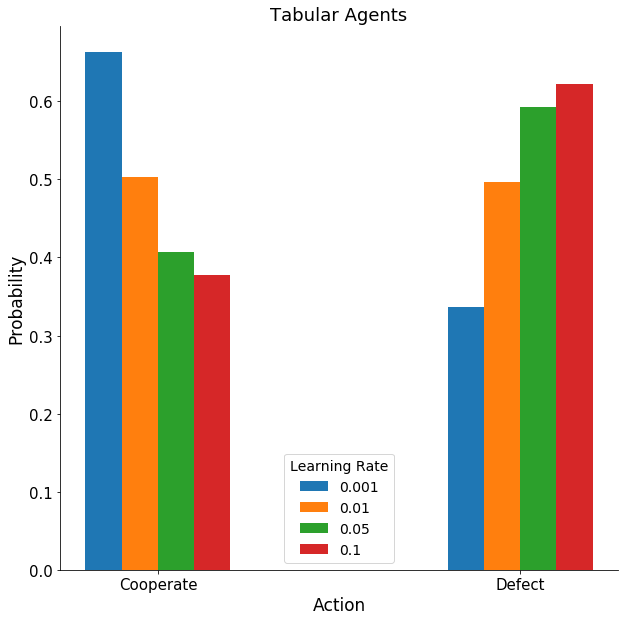

In [26]:
coop_lr_001 = df[df["learning_rate"] == 0.001]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.001])
coop_lr_01 = df[df["learning_rate"] == 0.01]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.01])
coop_lr_05 = df[df["learning_rate"] == 0.05]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.05])
coop_lr_1 = df[df["learning_rate"] == 0.1]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.1])

defect_lr_001 = df[df["learning_rate"] == 0.001]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.001])
defect_lr_01 = df[df["learning_rate"] == 0.01]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.01])
defect_lr_05 = df[df["learning_rate"] == 0.05]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.05])
defect_lr_1 = df[df["learning_rate"] == 0.1]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.1])

cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(10, 10))
plt.bar(x_axis - 0.15, [coop_lr_001, defect_lr_001], 0.1, label="0.001")
plt.bar(x_axis - 0.05, [coop_lr_01, defect_lr_01], 0.1, label="0.01")
plt.bar(x_axis + 0.05, [coop_lr_05, defect_lr_05], 0.1, label="0.05")
plt.bar(x_axis + 0.15, [coop_lr_1, defect_lr_1], 0.1, label="0.1")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents")
plt.legend(title="Learning Rate")

<h1><center>POOLS</center></h1>

In [22]:
def calc_pool_avg_rank_count(df: pd.DataFrame) -> List[List]:
    pool_counts = list(zip(df["agents"].value_counts().index.to_list(), df["agents"].value_counts().to_list()))
    pool_avgs = []
    for r_idx, row in df.iterrows():
        found = 0
        for elem in pool_avgs:
            if elem[0] == row["agents"]:
                elem[1] += row["tn_rank"]
                found = 1
        if not found:
            pool_avgs.append([row["agents"], row["tn_rank"]])

    for pool in pool_avgs:
        for item in pool_counts:
            if pool[0] == item[0]:
                pool[1] = pool[1] / item[1]
                pool.append(item[1])
                break
    return pool_avgs

In [23]:
pools = calc_pool_avg_rank_count(df)
pools = sorted(pools, key = lambda x: x[1])
for pool in pools:
    print(f"Pool: {pool[0]},\nAvg Rank: {pool[1]},\nCount: {pool[2]}\n")

Pool: ['OmegaTFT', 'Pavlov', 'SecondByWeiner', 'Borufsen', 'Leyvraz'],
Avg Rank: 14.0,
Count: 3

Pool: ['TitForTat', 'TFTT', 'TTFT', 'GenerousTFT', 'OmegaTFT', 'Davis', 'Grofman', 'Leyvraz'],
Avg Rank: 17.677083333333332,
Count: 96

Pool: ['OmegaTFT', 'Pavlov', 'SecondByWeiner'],
Avg Rank: 19.0,
Count: 2

Pool: ['TitForTat', 'Joss', 'Downing'],
Avg Rank: 19.354166666666668,
Count: 96

Pool: ['TitForTat', 'Champion', 'Borufsen', 'SecondByCave', 'SecondByWmAdams', 'SecondByGraaskampKatzen'],
Avg Rank: 20.256944444444443,
Count: 144

Pool: ['GenerousTFT', 'GradualTFT', 'OmegaTFT', 'TTFT', 'TFTT', 'TitForTat'],
Avg Rank: 20.729166666666668,
Count: 96

Pool: ['SteinAndRapoport', 'TidemanAndChieruzzi', 'TitForTat', 'Grofman', 'Davis'],
Avg Rank: 20.760416666666668,
Count: 96

Pool: ['TitForTat', 'TidemanAndChieruzzi', 'Borufsen', 'SecondByGraaskampKatzen', 'Nydegger', 'Grofman', 'Shubik', 'Pavlov'],
Avg Rank: 20.822916666666668,
Count: 96

Pool: ['TitForTat', 'TidemanAndChieruzzi', 'Borufsen

<h1><center>COOPERATION VS TN RANK</center></h1>

In [41]:
df[df["tn_rank"] == tn_ranks[0]]

,model,lookback,epsilon,epsilon_decay,decay_limit,learning_rate,discount_rate,epochs,tr_cooperation_percentage,tr_defection_percentage,tr_final_loss,tr_mean_reward,tr_cumul_reward,tr_cumul_regret,tn_rank,tn_mean_score,tn_mean_time,agents
87,Tabular,8,0.10,0.0,0.05,0.100,0.99,2500,0.574047,0.425953,NaN,2.329828,10484224.0,3015776.0,1,791.511935,7.083088,"[TitForTat, TidemanAndChieruzzi, Borufsen, Sec..."
365,Tabular,2,0.05,0.0,0.05,0.050,0.99,2500,0.531870,0.468130,NaN,2.539432,7618297.0,1381703.0,1,791.003548,5.778068,"[TitForTat, Champion, Borufsen, SecondByCave, ..."
377,Tabular,2,0.20,0.0,0.05,0.001,0.99,2500,0.756028,0.243972,NaN,2.659469,7978408.0,1021592.0,1,793.355161,5.051010,"[TitForTat, Champion, Borufsen, SecondByCave, ..."
412,Tabular,2,0.05,0.0,0.05,0.050,0.95,2500,0.296521,0.703479,NaN,2.187498,8749991.0,3250009.0,1,796.438710,3.009082,"[TitForTat, TidemanAndChieruzzi, Borufsen, Sec..."
443,Tabular,4,0.10,0.0,0.05,0.010,0.99,2500,0.656140,0.343860,NaN,2.343424,9373694.0,2626306.0,1,810.337419,2.947395,"[TitForTat, TidemanAndChieruzzi, Borufsen, Sec..."
723,Tabular,4,0.10,0.0,0.05,0.010,0.99,2500,0.768614,0.231386,NaN,2.559574,6398934.0,1101066.0,1,805.336129,5.887136,"[OmegaTFT, Pavlov, SecondByWeiner, Borufsen, L..."
798,Tabular,8,0.05,0.0,0.05,0.001,0.99,2500,0.696698,0.303302,NaN,2.149701,3224551.0,1275449.0,1,800.561935,5.171181,"[TitForTat, Joss, Downing]"
826,Tabular,2,0.05,0.0,0.05,0.050,0.99,2500,0.512538,0.487462,NaN,2.229571,8918284.0,3081716.0,1,800.676452,5.777895,"[TitForTat, TFTT, TTFT, GenerousTFT, OmegaTFT,..."
838,Tabular,2,0.20,0.0,0.05,0.001,0.99,2500,0.388088,0.611912,NaN,2.033498,8133991.0,3866009.0,1,805.955806,5.784029,"[TitForTat, TFTT, TTFT, GenerousTFT, OmegaTFT,..."


Text(0, 0.5, 'Average Proportion of Moves that are Cooperate')

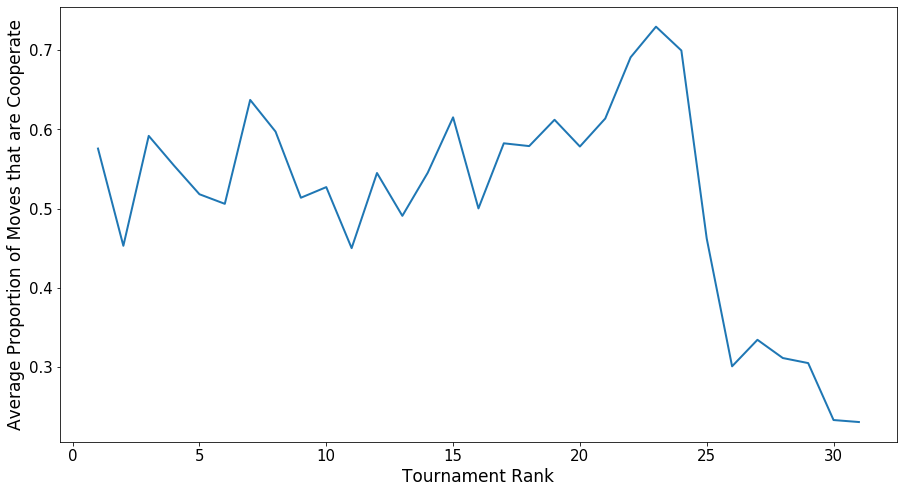

In [49]:
tn_ranks = []
for r_idx, row in df.iterrows():
    if not row["tn_rank"] in tn_ranks:
        tn_ranks.append(row["tn_rank"])
ranks_coop = {}
tn_ranks = sorted(tn_ranks)
for rank in tn_ranks:
    ranks_coop[rank] = df[df["tn_rank"] == rank]["tr_cooperation_percentage"].sum() / len(df[df["tn_rank"] == rank])

plt.figure(figsize=(15,8))
plt.plot(list(ranks_coop.keys()), list(ranks_coop.values()))
plt.xlabel("Tournament Rank")
plt.ylabel("Average Proportion of Moves that are Cooperate")